# Time-lapse inversion
In this notebook we will see how to use pyR2 API to do a time-lapse inversion (difference).

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.relpath('../src')) # add here the relative path of the API folder

from api.R2 import R2

API path =  /media/jkl/data/phd/tmp/pyr2/src/api
pyR2 version =  1.1.4


Then we can import all the dataset. Note that they should all be in the same directory and will be sorted according to alphabetical order.

In [2]:
k = R2()
k.createTimeLapseSurvey('../src/api/test/testTimelapse')

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/api/invdir
clearing the dirname
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
17031501.csv imported
--------- 17031501.csv imported
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
17040301.csv imported
--------- 17040301.csv imported
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
17042701.csv imported
--------- 17042701.csv imported
Inf or NaN: filterData: 0 / 314 quadrupoles removed.
strange quadrupoles: filterData: 0 / 314 quadrupoles removed.
48/314 reciprocal measurements NOT found.
0 measurements error > 20 %
17051601.cs

In [3]:
k.surveys # to display the list of the surveys object

The inversion is seamlessly the same. It will automatically take the first survey os background model. Invert it in a specific `ref` directory inside the working directory and then invert the other datasets.

In [4]:
k.invert(parallel=True) # takes a while because it invert all the surveys together

Create Rectangular mesh...
computed DOI : -2.50
Using a quadrilateral mesh.
quad
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
done

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
Matching quadrupoles between surveys for difference inversion ...measurements in common =  314
done in 0.07583s
done

------------ INVERTING REFERENCE SURVEY ---------------

written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.3 <<

 >> D a t e : 26 - 03 - 2019
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e 

Note that we can visualize the different inverted sections using `R2.showResults(index=0, attr='Resistivity(log10)')`.

reading ref /media/jkl/data/phd/tmp/pyr2/src/api/invdir/ref/f001_res.vtk
reading  /media/jkl/data/phd/tmp/pyr2/src/api/invdir/f001_res.vtk
reading  /media/jkl/data/phd/tmp/pyr2/src/api/invdir/f002_res.vtk
reading  /media/jkl/data/phd/tmp/pyr2/src/api/invdir/f003_res.vtk
Mesh plotted in 0.26050 seconds
Mesh plotted in 0.15182 seconds
Mesh plotted in 0.16060 seconds
Mesh plotted in 0.14716 seconds


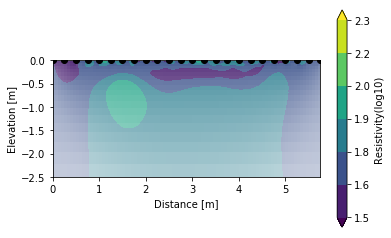

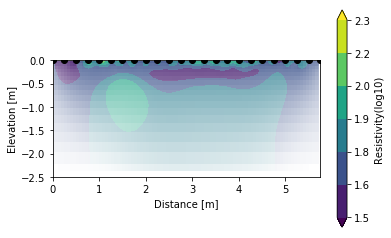

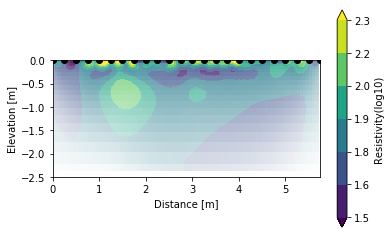

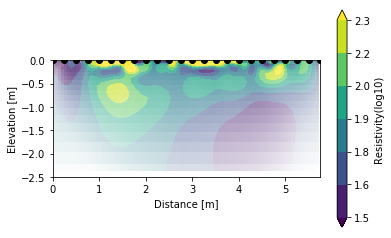

In [5]:
k.showResults(index=0, attr='Resistivity(log10)', contour=True, vmin=1.5, vmax=2.3)
k.showResults(index=1, attr='Resistivity(log10)', contour=True, vmin=1.5, vmax=2.3)
k.showResults(index=2, attr='Resistivity(log10)', contour=True, vmin=1.5, vmax=2.3)
k.showResults(index=3, attr='Resistivity(log10)', contour=True, vmin=1.5, vmax=2.3)

We can also look for the differences between each survey.

Mesh plotted in 0.13061 seconds
Mesh plotted in 0.14861 seconds
Mesh plotted in 0.15679 seconds


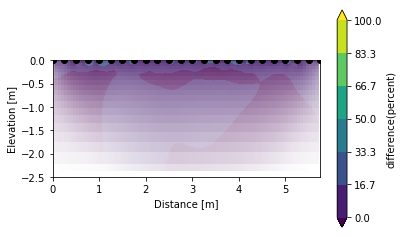

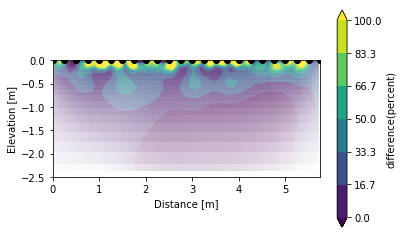

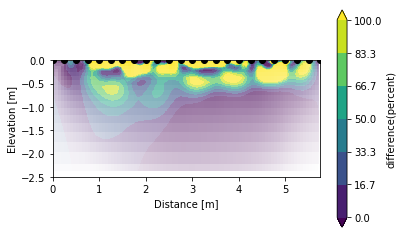

In [6]:
# the differnces are in percent in reference to the backround survey (index=0)
k.showResults(index=1, attr='difference(percent)', contour=True, vmin=0, vmax=100)
k.showResults(index=2, attr='difference(percent)', contour=True, vmin=0, vmax=100)
k.showResults(index=3, attr='difference(percent)', contour=True, vmin=0, vmax=100)

Like this we can observe a deeper positive change (drying) during the growth season of wheat mainly due to the root water uptake.